# Search and Research interests in 'Kubernetes' and 'Managed Kubernetes'

Install and import dependencies.

In [15]:
# RUN ONCE # 
#!pip install pandas
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/7.8 MB 13.0 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/7.8 MB 12.2 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------- ----------- 1.8/2.6 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 6.7 MB/s eta 0:00:00


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Load the two files.

In [21]:
# Read the CSV files, skipping the first two lines and without headers
kubernetes_interests = pd.read_csv(
    'data/kubernetes-google-trend-search-interests.csv',
    skiprows=2,
    header=0,
    engine='python'
)

managed_kubernetes_interests = pd.read_csv(
    'data/managed-kubernetes-google-trend-search-interests.csv',
    skiprows=2,
    header=0,
    engine='python'
)

print(kubernetes_interests.head())
print(managed_kubernetes_interests.head())
print(kubernetes_interests.tail())
print(managed_kubernetes_interests.tail())

     Month  "kubernetes": (Worldwide)
0  2015-01                          1
1  2015-02                          1
2  2015-03                          2
3  2015-04                          2
4  2015-05                          2
     Month  "managed kubernetes": (Worldwide)
0  2015-01                                  0
1  2015-02                                  0
2  2015-03                                  0
3  2015-04                                  0
4  2015-05                                  0
       Month  "kubernetes": (Worldwide)
114  2024-07                         89
115  2024-08                         90
116  2024-09                         85
117  2024-10                         85
118  2024-11                         55
       Month  "managed kubernetes": (Worldwide)
114  2024-07                                 82
115  2024-08                                 89
116  2024-09                                 77
117  2024-10                                 76
118  2024-11    

Merge the two files.

In [23]:
# Rename the columns for clarity and consistency
kubernetes_interests.columns = ['Month', 'Kubernetes (Worldwide)']
managed_kubernetes_interests.columns = ['Month', 'Managed Kubernetes (Worldwide)']

merged_df = pd.merge(
    kubernetes_interests,
    managed_kubernetes_interests,
    on='Month',
    how='outer'
)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('data/merged-search-interests.csv', index=False)

Some pre-processing of the merged data.

In [24]:
# Load the dataframe
kube_search_interests = pd.read_csv('data/merged-search-interests.csv')

# Convert 'Month' to datetime
kube_search_interests['Month'] = pd.to_datetime(kube_search_interests['Month'])

# Set 'Month' as the index
kube_search_interests.set_index('Month', inplace=True)


Now we plot the data.

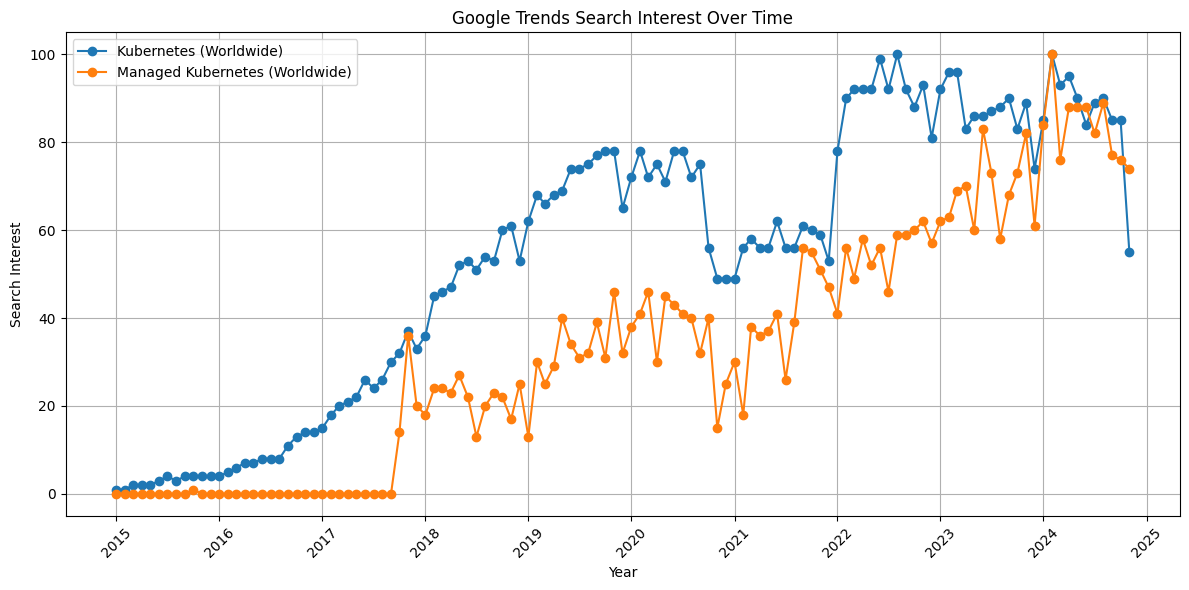

In [ ]:
# Create the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot each line
plt.plot(kube_search_interests.index, kube_search_interests['Kubernetes (Worldwide)'], label='Kubernetes (Worldwide)', marker='o')
plt.plot(kube_search_interests.index, kube_search_interests['Managed Kubernetes (Worldwide)'], label='Managed Kubernetes (Worldwide)', marker='o')

# Format the x-axis for dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tick labels as years

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Search Interest')
plt.title('Google Trends Search Interest Over Time')

# Add a legend
plt.legend()

# Add a grid
plt.grid(True)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()